# Graph convolutional Network

This tutorial based on 
1. [Theoretical Foundations of Graph Neural Networks](https://www.youtube.com/watch?v=uF53xsT7mjc) and 
2. [Graph Neural Networks](https://www.youtube.com/playlist?list=PLSgGvve8UweGx4_6hhrF3n4wpHf_RV76_)

## Convolutional Graph Neural Network in Detail


Let 
+ $X \in \mathbb{R}^{N \times d}$ be a matrix of node feature vectors.
+ $A \in \mathbb{R}^{N \times N}$ be an adjacency matrix
+ $D$ be a degree matrix ,i.e., $D_{ii}= \sum_j A_{ij}$

$$ H^{l+1} = \sigma \,( \tilde{D}^{-\frac{1}{2}} \, \tilde{A} \, \tilde{D}^{-\frac{1}{2}} \, H^l \, W^l)$$


+ $\tilde{A} = A + I$ is the adjacency matrix of the undirected graph G with added self-connections,i.e., $I$ is the indendity matrix.


+ $\tilde{D}_{ii}=\sum_j \tilde{A}_{ij}$


+ $H^l \in \mathbb{R}^{N \times D}$ is the matrix in the l.th layer. Hence $H^0$= X is a matrix of node feature vectors.

$$ 
A=\begin{bmatrix} 
0 \quad 1 \quad 0 \quad 0 \quad 0 \\
1 \quad 0 \quad 1 \quad 0 \quad 0 \\
0 \quad 1 \quad 0 \quad 1 \quad 1 \\
0 \quad 0 \quad 1 \quad 0 \quad 0 \\
0 \quad 0 \quad 1 \quad 0 \quad 0 \\
\end{bmatrix} 
$$
$$
D=\begin{bmatrix} 
1 \quad 0 \quad 0 \quad 0 \quad 0 \\
0 \quad 2 \quad 0 \quad 0 \quad 0 \\
0 \quad 0 \quad 3 \quad 0 \quad 0 \\
0 \quad 0 \quad 0 \quad 1 \quad 0 \\
0 \quad 0 \quad 0 \quad 0 \quad 1 \\
\end{bmatrix} 
$$ and $D^{-1}$ denotes the inverse of $D$.
$$
D^{-1}=\begin{bmatrix} 
1.0 \quad 0 \quad 0 \quad 0 \quad 0 \\
0 \quad .5 \quad 0 \quad 0 \quad 0 \\
0 \quad 0 \quad .3 \quad 0 \quad 0 \\
0 \quad 0 \quad 0 \quad 1. \quad 0 \\
0 \quad 0 \quad 0 \quad 0 \quad 1. \\
\end{bmatrix} 
$$

$$ D^{-1} \cdot A \cdot x=y,$$

$$ 
\begin{bmatrix} 
1.0 \quad 0 \quad 0 \quad 0 \quad 0 \\
0 \quad .5 \quad 0 \quad 0 \quad 0 \\
0 \quad 0 \quad .3 \quad 0 \quad 0 \\
0 \quad 0 \quad 0 \quad 1. \quad 0 \\
0 \quad 0 \quad 0 \quad 0 \quad 1. \\
\end{bmatrix} 
\cdot
\begin{bmatrix} 
0 \quad 1 \quad 0 \quad 0 \quad 0 \\
1 \quad 0 \quad 1 \quad 0 \quad 0 \\
0 \quad 1 \quad 0 \quad 1 \quad 1 \\
0 \quad 0 \quad 1 \quad 0 \quad 0 \\
0 \quad 0 \quad 1 \quad 0 \quad 0 \\
\end{bmatrix} 
\cdot
\begin{bmatrix} 1 \\
2 \\
3 \\
4 \\
5 \\
\end{bmatrix}
=
\begin{bmatrix} 
2. \\
2. \\
3.3 \\
3.0 \\
3.0 \\
\end{bmatrix}
$$

+ The vector representation of the $i-$th node is represented with $x_i$.
+ $A_{i:} \cdot x=y_i$ update the vector representation of the $i-$th node.
+ This means that $y_i$ is a sum of the features of the neighbouring nodes.


In [1]:
import numpy as np
from scipy.linalg import sqrtm 

import networkx as nx
from scipy.linalg import sqrtm 
import matplotlib.pyplot as plt
from matplotlib import animation
%matplotlib inline
from IPython.display import HTML

# (1) A is given
A = np.array(
    [[0, 1, 0, 0, 0], 
     [1, 0, 1, 0, 0], 
     [0, 1, 0, 1, 1], 
     [0, 0, 1, 0, 0], 
     [0, 0, 1, 0, 0]])

# (2) Compute A tilde.
A_tilda = A + np.identity(len(A))

# (3) Compute D and D tilde.
D = np.zeros(A.shape)
np.fill_diagonal(D, A.sum(axis=0))
D_tilda = D + np.identity(len(D))
D_tilda_inv_sqrt=sqrtm(np.linalg.inv(D_tilda))

$$ \tilde A = A + I$$
$$ \tilde D = D + I$$


$$ \hat A = \tilde D ^{-\frac{1}{2}} \tilde A \tilde D ^{-\frac{1}{2}}$$


In [2]:
D_tilda_inv_sqrt @ A_tilda @ D_tilda_inv_sqrt 

array([[0.5       , 0.40824829, 0.        , 0.        , 0.        ],
       [0.40824829, 0.33333333, 0.28867513, 0.        , 0.        ],
       [0.        , 0.28867513, 0.25      , 0.35355339, 0.35355339],
       [0.        , 0.        , 0.35355339, 0.5       , 0.        ],
       [0.        , 0.        , 0.35355339, 0.        , 0.5       ]])

$$\sigma \,( \tilde{D}^{-\frac{1}{2}} \, \tilde{A} \, \tilde{D}^{-\frac{1}{2}} \, X \, W)$$


In [3]:
X=np.random.randn(5,5)
W=np.random.randn(5,1)

# New Representation of input.
D_tilda_inv_sqrt @ A_tilda @ D_tilda_inv_sqrt @ X @ W

array([[ 0.04669446],
       [ 1.08883771],
       [-0.19833822],
       [ 1.12762852],
       [ 0.41792461]])

# Visualising feature updates

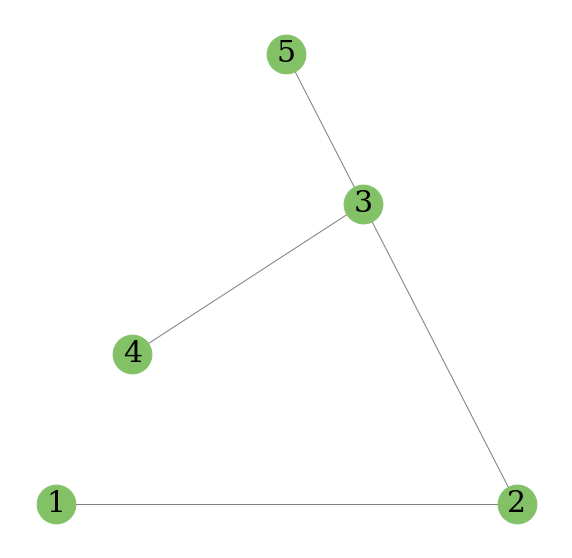

In [4]:
# (1) Create nx Network
g = nx.from_numpy_array(A)
# (2) Compute tilda
A_mod = A + np.eye(g.number_of_nodes())

# D for A_mod:
D_mod = np.zeros_like(A_mod)
np.fill_diagonal(D_mod, A_mod.sum(axis=1).flatten())

# Inverse square root of D:
D_mod_invroot = np.linalg.inv(sqrtm(D_mod))
node_labels = {i: i+1 for i in range(g.number_of_nodes())}
pos = nx.planar_layout(g)
fig, ax = plt.subplots(figsize=(10,10))
nx.draw(g, pos, with_labels=True, labels=node_labels, node_color='#83C167', edge_color='gray', node_size=1500, font_size=30, font_family='serif')


In [5]:

A_hat = D_mod_invroot @ A_mod @ D_mod_invroot
A_hat


H = np.zeros((g.number_of_nodes(), 1))
H

H[0,0] = 1 # the "water drop"
iters = 20
results = [H.flatten()]
for i in range(iters):
    H = A_hat @ H
    results.append(H.flatten())
print(f"Initial signal input: {results[0]}")
print(f"Final signal output after running {iters} steps of message-passing:  {results[-1]}")

Initial signal input: [1. 0. 0. 0. 0.]
Final signal output after running 20 steps of message-passing:  [0.1559171  0.18976912 0.21665888 0.15263111 0.15263111]


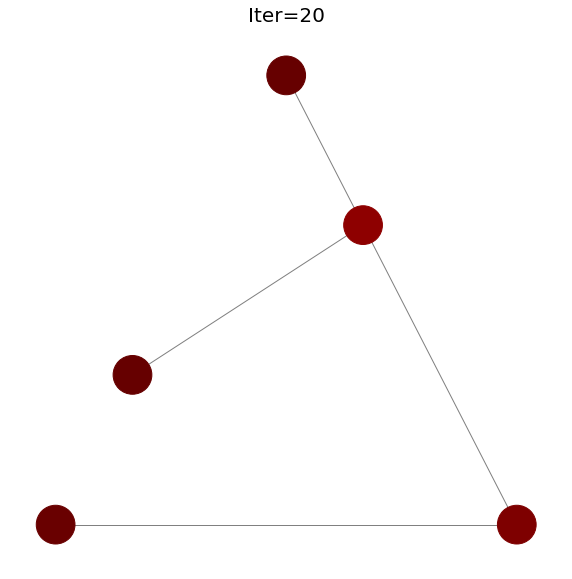

In [6]:

fig, ax = plt.subplots(figsize=(10, 10))
kwargs = {'cmap': 'hot', 'node_size': 1500, 'edge_color': 'gray', 
          'vmin': np.array(results).min(), 'vmax': np.array(results).max()*1.1}
def update(idx):
    ax.clear()
    colors = results[idx]
    nx.draw(g, pos, node_color=colors, ax=ax, **kwargs)
    ax.set_title(f"Iter={idx}", fontsize=20)
HTML(animation.FuncAnimation(fig, update, frames=len(results), interval=1000, repeat=True).to_html5_video())

# More theoretical preliminaries


##  1. Permutation Invariance Property

We require that our algorithms to satisfiy the permutation invariance property. This requirement stems from the fact that graph structured data does not involve ordering. Hence, the order of nodes should not matter for us. 



Let $X \in \mathbb{R}^{n \times d}$ represent node features and $P$ be a permutation. A function $f$ permutation invariant if

## $$ f(\textbf{P} \textbf{X}) = f(\textbf{X})$$

Let's take a look at some permutation invariant functions

## Deep Sets by Zaheer et al. NeurIPS 2017

A generic form:
## $$ f(\textbf{X}) = f(\textbf{P}\textbf{X})$$
## $$ f(\textbf{X}) = \phi \Bigg(\Sigma_i \psi(x_i) \Bigg),$$

where $\phi$ and $ \psi $ are learnable functions. $\phi$ is a __permutation invariant aggregation function__ (e.g. summation, averagining, maximization).

##  2. Permutation Equivariance Property


## $$ f(\textbf{P}\textbf{X}) = \textbf{P}f(\textbf{X})$$

## $$ f(\textbf{X}) = \phi \Bigg( \Phi_i \psi(x_i) \Bigg),$$

where $\Phi$ is a permutation-invariant aggregator (such as sum, avg or max)

In [7]:
import numpy as np
# Number of nodes and size of features
n,d=4,2
# (1) Node Representation
X=np.random.randn(n,d)
# (2) Permutation Matrix
P=np.identity(n)[np.random.permutation(n)]
print(f'X:\n{X}\n')
print(f'PX:\n{P@X}')
print('\t\t\t\t Only order is changed.')
# Sum
sumX=np.einsum("ij->",X)
sumPX=np.einsum("ij->",P@X)
print(f'Σ_i Σ_j X_ij=> {np.allclose(sumX,sumPX,atol=1e4)}, {sumX:.3f}')

# Column Sum
colsumX=np.einsum("ij-> j ",X)
colsumPX=np.einsum("ij-> j ",P@X)
print(f'Σ_i X_ij=> {np.allclose(colsumX,colsumPX,atol=1e4)}, {colsumX}')

# Row Sum
rowsumX=np.einsum("ij-> i ",X)
rowsumPX=np.einsum("ij-> i ",P@X)
print(f'Σ_j X_ij=> {np.allclose(rowsumX,rowsumPX,atol=1e4)}, {rowsumX}')

X:
[[ 0.23130674 -0.17238292]
 [ 1.7595618  -0.71230477]
 [-0.30582224  0.31453775]
 [-1.16573429 -0.58862348]]

PX:
[[-0.30582224  0.31453775]
 [ 1.7595618  -0.71230477]
 [-1.16573429 -0.58862348]
 [ 0.23130674 -0.17238292]]
				 Only order is changed.
Σ_i Σ_j X_ij=> True, -0.639
Σ_i X_ij=> True, [ 0.51931201 -1.15877342]
Σ_j X_ij=> True, [ 0.05892382  1.04725703  0.00871551 -1.75435777]


# Learning on Graphs

We can represent edges with a __A__ be a binary adjacency matrix.

## Invariance: $$ f(\textbf{P}\textbf{X},\textbf{P} \textbf{A} \textbf{P}^T) = f(\textbf{X},\textbf{A})$$


## Equivariance: $$ f(\textbf{P}\textbf{X},\textbf{P} \textbf{A} \textbf{P}^T) = \textbf{P}f(\textbf{X},\textbf{A})$$



## Neighbourhood:
$$ \mathcal{N}_i = \{ j, (i,j) \in \mathcal{E} \vee (j,i) \in \mathcal{E} \} $$


$$ 
f(\textbf{X},\textbf{A})=\begin{bmatrix} 
- \quad g( \textbf{x}_1, \textbf{X}_{\mathcal{N}_1} ) \quad-\\
- \quad g( \textbf{x}_2, \textbf{X}_{\mathcal{N}_2} ) \quad-\\
\cdots \\
- \quad g( \textbf{x}_n, \textbf{X}_{\mathcal{N}_n} ) \quad-\\
\end{bmatrix} 
$$

g should be also permutation invariant.



# Graph Convolutional Neural Network


### $$ h_i = \phi \, \Big( x_i , \Phi_{j \in \mathcal{N}_i} c_{ij} \, \psi(x_j) \Big)$$
where __features of neighbours aggregated with fixed weight $c_{ij}$__. Useful for homophilous graphs and scaling up: when edges encode label similarity.

# Attention Graph Neural Network

### $$ h_i = \phi \, \big( x_i , \Phi_{j \in \mathcal{N}_i} a(x_i,x_j) \, \psi(x_j) \big)$$
where __features of neighbours aggregated with implicit weights (via attention)__. Usefull: Edges need not encode homophily.

# Mesage-passing Graph Neural Network

### $$ h_i = \phi \, \big( x_i , \Phi_{j \in \mathcal{N}_i} \psi(x_i,x_j) \big)$$


# Implementation

### 1. What does matrix product of A and X imply ?

Matrix product of an adjecency matrix $A$ with node representations $X$ "updates" each node representations $X_i$ with its neighbours $A_i$. 

Let's understand this computation in detail. Assume that $A$ is a idendity matrix, hence, the impact of neighbors of $i$th node is __zero__.

In [8]:
n,d=4,2
A=np.eye(n)
X=np.random.randn(n,d)
AX=np.einsum('ik,kj->ij', A, X)
print(f'A:\n{A}\n')
print(f'X:\n{X}\n')
print(f'AX:\n{AX}\n')

A:
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

X:
[[ 0.28889537  1.09321337]
 [ 1.83892694  0.18605693]
 [ 1.14810484 -1.63348288]
 [-1.01341867 -0.04361163]]

AX:
[[ 0.28889537  1.09321337]
 [ 1.83892694  0.18605693]
 [ 1.14810484 -1.63348288]
 [-1.01341867 -0.04361163]]



### 2. Why don't we extend the neighbourhood?

In [9]:
# Let's connect 
A[0][1]=1 # n_0 => n_1
A[1][0]=1 # n_1 => n_0

A[2][1]=1 # n_2 => n_1
A[1][2]=1 # n_1 => n_2

A

array([[1., 1., 0., 0.],
       [1., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 0., 0., 1.]])

In [10]:
# Node 0 and Node 2 are not connected
assert A[0][2]==A[2][0]==0.0

In [11]:
# Neigbours of neighbours
neighbours_of_neighbours_scalar=.5
A+= ((A+A@A ==1) *1.0) * neighbours_of_neighbours_scalar 
print(f'A:\n{A}\n')
print(A[0][2])
print(A[2][0])

A:
[[1.  1.  0.5 0. ]
 [1.  1.  1.  0. ]
 [0.5 1.  1.  0. ]
 [0.  0.  0.  1. ]]

0.5
0.5


In [12]:
AX=np.einsum('ik,kj->ij', A, X)
print(f'A:\n{A}\n')
print(f'AX:\n{AX}\n')

A:
[[1.  1.  0.5 0. ]
 [1.  1.  1.  0. ]
 [0.5 1.  1.  0. ]
 [0.  0.  0.  1. ]]

AX:
[[ 2.70187473  0.46252885]
 [ 3.27592715 -0.35421259]
 [ 3.13147947 -0.90081927]
 [-1.01341867 -0.04361163]]



# Node Classification

In [13]:
import tensorflow as tf
import spektral

In [14]:
A, X, labels, train_mask, val_mask, test_mask = spektral.datasets.citation.load_data(dataset_name='cora')

Loading cora dataset
Pre-processing node features


In [15]:
X,A = X.todense(),A.todense()

A = A + np.eye(A.shape[0])
X = X.astype('float32')
A = A.astype('float32')

print('X:',X.shape)
print('A:',A.shape)
# Labels
print('Y:',labels.shape)

X: (2708, 1433)
A: (2708, 2708)
Y: (2708, 7)


In [16]:
print(X[0])
print(A[0])
print(labels[0])

[[0. 0. 0. ... 0. 0. 0.]]
[[1. 0. 0. ... 0. 0. 0.]]
[0 0 0 1 0 0 0]


In [17]:
print(train_mask[0])
print(train_mask.shape)
print(np.sum(train_mask)) # True

True
(2708,)
140


In [18]:
print(val_mask[0])
print(val_mask.shape)
print(np.sum(val_mask)) # True

False
(2708,)
500


In [19]:
print(test_mask[0])
print(test_mask.shape)
print(np.sum(test_mask)) # True

False
(2708,)
1000


In [20]:
def masked_softmax_cross_entropy(logits, labels, masks):
    loss = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels)
    masks = tf.cast(masks, dtype=tf.float32)
    masks /= tf.reduce_mean(masks)
    loss *= masks
    return tf.reduce_mean(loss)

In [21]:
def masked_accuracy(logits, labels, masks):
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1))
    accuracy_all = tf.cast(correct_prediction, tf.float32)
    masks = tf.cast(masks, dtype=tf.float32)
    masks /= tf.reduce_mean(masks)
    accuracy_all *= masks
    return tf.reduce_mean(accuracy_all)

In [22]:
def gnn(fts, adj, transform, activation):
    seq_fts = transform(fts)
    ret_fts = tf.matmul(adj, seq_fts)
    return activation(ret_fts)

In [23]:
def train_cora(fts, adj, gnn_fn, units=32, epochs=200, lr=.01):
    lyr_1 = tf.keras.layers.Dense(units)
    lyr_2 = tf.keras.layers.Dense(7)  # for 7 classes

    def cora_gnn(fts, adj):
        hidden = gnn_fn(fts, adj, lyr_1, tf.nn.relu)
        logits = gnn_fn(hidden, adj, lyr_2, tf.identity)
        return logits

    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    best_accuracy = 0.0

    for ep in range(epochs + 1):
        with tf.GradientTape() as t:
            logits = cora_gnn(fts, adj)
            loss = masked_softmax_cross_entropy(logits, labels, train_mask)
        variables = t.watched_variables()
        grad = t.gradient(loss, variables)
        optimizer.apply_gradients(zip(grad, variables))

        logits = cora_gnn(fts, adj)
        val_accuracy = masked_accuracy(logits, labels, val_mask)
        test_accuracy = masked_accuracy(logits, labels, test_mask)

        if val_accuracy > best_accuracy:
            best_accuracy = val_accuracy
            print(f'Epoch {ep} | Traninng Loss: {loss.numpy():.3f} | Val acc: {val_accuracy.numpy():.3f} Test Acc: {test_accuracy.numpy():.3f}| ')
    print('Completed')

In [24]:
print('Sum Pooling of neighbours')
train_cora(X, A, gnn)

Sum Pooling of neighbours
Epoch 0 | Traninng Loss: 2.013 | Val acc: 0.074 Test Acc: 0.097| 
Epoch 1 | Traninng Loss: 2.036 | Val acc: 0.424 Test Acc: 0.443| 
Epoch 2 | Traninng Loss: 1.687 | Val acc: 0.432 Test Acc: 0.436| 
Epoch 3 | Traninng Loss: 1.500 | Val acc: 0.540 Test Acc: 0.566| 
Epoch 4 | Traninng Loss: 1.375 | Val acc: 0.598 Test Acc: 0.618| 
Epoch 5 | Traninng Loss: 1.242 | Val acc: 0.680 Test Acc: 0.668| 
Epoch 6 | Traninng Loss: 1.146 | Val acc: 0.718 Test Acc: 0.716| 
Epoch 7 | Traninng Loss: 1.050 | Val acc: 0.746 Test Acc: 0.742| 
Epoch 8 | Traninng Loss: 0.954 | Val acc: 0.758 Test Acc: 0.760| 
Epoch 9 | Traninng Loss: 0.865 | Val acc: 0.770 Test Acc: 0.771| 
Completed


In [25]:
# neighbours of neighbours
neighbours_of_neighbours_scalar=.1
A_neg= A+((A+A@A ==1) *1.0) * neighbours_of_neighbours_scalar 
A_neg = A_neg.astype('float32')

In [26]:
print('Sum Pooling of neighbours')
train_cora(X, A_neg, gnn)

Sum Pooling of neighbours
Epoch 0 | Traninng Loss: 1.872 | Val acc: 0.112 Test Acc: 0.144| 
Epoch 1 | Traninng Loss: 1.867 | Val acc: 0.382 Test Acc: 0.387| 
Epoch 2 | Traninng Loss: 1.913 | Val acc: 0.422 Test Acc: 0.435| 
Epoch 3 | Traninng Loss: 1.869 | Val acc: 0.646 Test Acc: 0.636| 
Epoch 4 | Traninng Loss: 1.491 | Val acc: 0.700 Test Acc: 0.706| 
Epoch 5 | Traninng Loss: 1.250 | Val acc: 0.702 Test Acc: 0.696| 
Epoch 14 | Traninng Loss: 0.770 | Val acc: 0.708 Test Acc: 0.722| 
Epoch 17 | Traninng Loss: 0.627 | Val acc: 0.732 Test Acc: 0.753| 
Epoch 19 | Traninng Loss: 0.580 | Val acc: 0.742 Test Acc: 0.752| 
Epoch 20 | Traninng Loss: 0.567 | Val acc: 0.748 Test Acc: 0.756| 
Epoch 73 | Traninng Loss: 0.106 | Val acc: 0.752 Test Acc: 0.738| 
Completed


In [27]:
# (2) Rely on yourself; Do not make use of your first neighbours: Node feature + Identity  matrix + GNN
print('Only itself')
train_cora(X, tf.eye(A.shape[0]), gnn)

Only itself
Epoch 0 | Traninng Loss: 1.947 | Val acc: 0.166 Test Acc: 0.167| 
Epoch 1 | Traninng Loss: 1.933 | Val acc: 0.304 Test Acc: 0.282| 
Epoch 2 | Traninng Loss: 1.914 | Val acc: 0.452 Test Acc: 0.416| 
Epoch 3 | Traninng Loss: 1.888 | Val acc: 0.498 Test Acc: 0.451| 
Epoch 8 | Traninng Loss: 1.713 | Val acc: 0.516 Test Acc: 0.468| 
Epoch 9 | Traninng Loss: 1.668 | Val acc: 0.530 Test Acc: 0.484| 
Epoch 10 | Traninng Loss: 1.621 | Val acc: 0.542 Test Acc: 0.490| 
Epoch 11 | Traninng Loss: 1.571 | Val acc: 0.550 Test Acc: 0.491| 
Epoch 16 | Traninng Loss: 1.290 | Val acc: 0.550 Test Acc: 0.502| 
Epoch 19 | Traninng Loss: 1.103 | Val acc: 0.554 Test Acc: 0.509| 
Epoch 20 | Traninng Loss: 1.039 | Val acc: 0.556 Test Acc: 0.513| 
Epoch 22 | Traninng Loss: 0.912 | Val acc: 0.558 Test Acc: 0.515| 
Epoch 31 | Traninng Loss: 0.420 | Val acc: 0.560 Test Acc: 0.526| 
Completed


In [28]:
# (3) Make use of average of  your first neighbours (1) Node feature + Degree normalized ADJ matrix + GNN
print('Average Pooling')
degree_matrix = tf.reduce_sum(A, axis=-1)
train_cora(X, A / degree_matrix, gnn)

Average Pooling
Epoch 0 | Traninng Loss: 1.945 | Val acc: 0.180 Test Acc: 0.199| 
Epoch 1 | Traninng Loss: 1.931 | Val acc: 0.200 Test Acc: 0.231| 
Epoch 2 | Traninng Loss: 1.914 | Val acc: 0.204 Test Acc: 0.229| 
Epoch 5 | Traninng Loss: 1.846 | Val acc: 0.210 Test Acc: 0.246| 
Epoch 6 | Traninng Loss: 1.821 | Val acc: 0.238 Test Acc: 0.269| 
Epoch 7 | Traninng Loss: 1.794 | Val acc: 0.270 Test Acc: 0.297| 
Epoch 8 | Traninng Loss: 1.765 | Val acc: 0.288 Test Acc: 0.324| 
Epoch 9 | Traninng Loss: 1.735 | Val acc: 0.330 Test Acc: 0.364| 
Epoch 10 | Traninng Loss: 1.702 | Val acc: 0.394 Test Acc: 0.410| 
Epoch 11 | Traninng Loss: 1.667 | Val acc: 0.444 Test Acc: 0.458| 
Epoch 12 | Traninng Loss: 1.630 | Val acc: 0.520 Test Acc: 0.532| 
Epoch 13 | Traninng Loss: 1.592 | Val acc: 0.586 Test Acc: 0.590| 
Epoch 14 | Traninng Loss: 1.552 | Val acc: 0.642 Test Acc: 0.630| 
Epoch 15 | Traninng Loss: 1.511 | Val acc: 0.672 Test Acc: 0.668| 
Epoch 16 | Traninng Loss: 1.469 | Val acc: 0.686 Test 

In [29]:
# neighbours of neighbours
neighbours_of_neighbours_scalar=1.0
A_neg= A+((A+A@A ==1) *1.0) * neighbours_of_neighbours_scalar 
A_neg = A_neg.astype('float32')

degree_matrix_A_neg = tf.reduce_sum(A_neg, axis=-1)
train_cora(X, A_neg / degree_matrix_A_neg, gnn)

Epoch 0 | Traninng Loss: 1.946 | Val acc: 0.130 Test Acc: 0.139| 
Epoch 6 | Traninng Loss: 1.885 | Val acc: 0.134 Test Acc: 0.146| 
Epoch 7 | Traninng Loss: 1.870 | Val acc: 0.202 Test Acc: 0.213| 
Epoch 8 | Traninng Loss: 1.854 | Val acc: 0.262 Test Acc: 0.300| 
Epoch 9 | Traninng Loss: 1.837 | Val acc: 0.356 Test Acc: 0.398| 
Epoch 10 | Traninng Loss: 1.820 | Val acc: 0.502 Test Acc: 0.516| 
Epoch 11 | Traninng Loss: 1.801 | Val acc: 0.574 Test Acc: 0.582| 
Epoch 12 | Traninng Loss: 1.780 | Val acc: 0.626 Test Acc: 0.625| 
Epoch 13 | Traninng Loss: 1.758 | Val acc: 0.654 Test Acc: 0.652| 
Epoch 14 | Traninng Loss: 1.735 | Val acc: 0.678 Test Acc: 0.681| 
Epoch 15 | Traninng Loss: 1.710 | Val acc: 0.692 Test Acc: 0.698| 
Epoch 16 | Traninng Loss: 1.683 | Val acc: 0.712 Test Acc: 0.718| 
Epoch 17 | Traninng Loss: 1.654 | Val acc: 0.718 Test Acc: 0.735| 
Epoch 18 | Traninng Loss: 1.624 | Val acc: 0.734 Test Acc: 0.751| 
Epoch 19 | Traninng Loss: 1.594 | Val acc: 0.750 Test Acc: 0.760| 


In [30]:
# (4) It is a good idea to normalize adjesonsy matrix
norm_degr = tf.linalg.diag(1.0 / tf.sqrt(degree_matrix))
norm_A = tf.linalg.matmul(norm_degr, tf.matmul(A, norm_degr))
print('Normalized Pooling')
train_cora(X, norm_A, gnn)

Normalized Pooling
Epoch 0 | Traninng Loss: 1.946 | Val acc: 0.358 Test Acc: 0.395| 
Epoch 1 | Traninng Loss: 1.935 | Val acc: 0.378 Test Acc: 0.429| 
Epoch 2 | Traninng Loss: 1.921 | Val acc: 0.414 Test Acc: 0.443| 
Epoch 3 | Traninng Loss: 1.901 | Val acc: 0.446 Test Acc: 0.475| 
Epoch 4 | Traninng Loss: 1.881 | Val acc: 0.482 Test Acc: 0.524| 
Epoch 5 | Traninng Loss: 1.860 | Val acc: 0.522 Test Acc: 0.555| 
Epoch 6 | Traninng Loss: 1.838 | Val acc: 0.554 Test Acc: 0.578| 
Epoch 7 | Traninng Loss: 1.814 | Val acc: 0.580 Test Acc: 0.622| 
Epoch 8 | Traninng Loss: 1.788 | Val acc: 0.620 Test Acc: 0.644| 
Epoch 9 | Traninng Loss: 1.760 | Val acc: 0.648 Test Acc: 0.677| 
Epoch 10 | Traninng Loss: 1.730 | Val acc: 0.664 Test Acc: 0.710| 
Epoch 11 | Traninng Loss: 1.698 | Val acc: 0.694 Test Acc: 0.720| 
Epoch 12 | Traninng Loss: 1.665 | Val acc: 0.712 Test Acc: 0.741| 
Epoch 13 | Traninng Loss: 1.630 | Val acc: 0.720 Test Acc: 0.756| 
Epoch 14 | Traninng Loss: 1.594 | Val acc: 0.740 Test